# Environment Setup / Package Installation

In [8]:
!pip install -U statsmodels==0.11.0

     |████████████████████████████████| 8.7 MB 6.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [9]:
!pip install -U pmdarima==1.8.0

     |████████████████████████████████| 1.5 MB 7.6 MB/s 
     |████████████████████████████████| 2.1 MB 60.5 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


In [36]:
!pip install -U fbprophet==0.7.1

# Traditional Time Series Forecasting 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## 1. Dataset (Mauna Lua CO2)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving maunalua.csv to maunalua.csv


In [2]:
maunaloa = pd.read_csv('maunalua.csv',
                       parse_dates=[[0, 1]], na_values=[-999.99],
                        index_col="Year_Month")
maunaloa.head()

,Decimal Date,co2,Seasonally Adjusted CO2,Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
Year_Month,,,,,
1958-03-01,1958.2027,315.69,314.42,316.18,314.89
1958-04-01,1958.2877,317.45,315.15,317.30,314.98
1958-05-01,1958.3699,317.50,314.73,317.83,315.06
1958-06-01,1958.4548,NaN,NaN,317.22,315.14
1958-07-01,1958.5370,315.86,315.17,315.87,315.21


## 2. Basic Preprocessing to replace the missing values

In [3]:
# entire data
y= maunaloa.copy()
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

## 3. Train and Test Dataset keeping the temporal order

In [4]:
#Creating train with 610 months and test set 98 months
train=y[0:610] 
test=y[610:708]


In [6]:
train.tail()

Year_Month
2008-08-01    384.08
2008-09-01    383.09
2008-10-01    382.78
2008-11-01    384.01
2008-12-01    385.11
Freq: MS, Name: co2, dtype: float64

## 4. Perform Hyperparameter search for ARIMA 

In [5]:
# Import the library 
from pmdarima import auto_arima 
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(train, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=373.782, Time=3.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=725.657, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=546.596, Time=0.91 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=385.612, Time=1.60 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=664.737, Time=0.32 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=375.773, Time=4.14 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=375.772, Time=8.98 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=523.661, Time=1.41 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=377.741, Time=12.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=399.951, Time=1.92 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=375.757, Time=5.81 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=375.762, Time=4.83 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=376.202, Time=2.07 sec
 ARIMA(2,1,0)(0,1,1)[12]            

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  610
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -182.891
Date:                            Wed, 08 Sep 2021   AIC                            373.782
Time:                                    20:00:52   BIC                            391.349
Sample:                                         0   HQIC                           380.622
                                            - 610                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3801      0.077      4.932      0.000       0.229       0.531
ma.L1         -0.6886      0.064    -10.809      0.000      -0.813      -0.564
ma.S.L12      -0.8750      0.025    -35.367      0.000      -0.923      -0.826
sigma2         0.1049      0.004     24.566      0.000       0.097       0.113
===================================================================================
Ljung-Box (Q):                       35.64   Jarque-Bera (JB):               219.13
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.40
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 5. SARIMAX MODEL 

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (1, 1, 1),  
                seasonal_order =(0, 1, 1, 12)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                co2   No. Observations:                  610
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -182.891
Date:                            Wed, 08 Sep 2021   AIC                            373.782
Time:                                    20:01:07   BIC                            391.349
Sample:                                03-01-1958   HQIC                           380.622
                                     - 12-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3801      0.077      4.932      0.000       0.229       0.531
ma.L1         -0.6886      0.064    -10.809      0.000      -0.813      -0.564
ma.S.L12      -0.8750      0.025    -35.367      0.000      -0.923      -0.826
sigma2         0.1049      0.004     24.566      0.000       0.097       0.113
===================================================================================
Ljung-Box (Q):                       35.64   Jarque-Bera (JB):               219.13
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.40
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 5.1 Forecasting on Test data

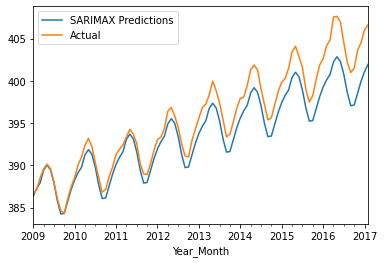

In [7]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions the test set 
sarima_predictions = result.predict(start, end, 
                             typ = 'levels').rename("SARIMAX Predictions") 
  
# plot predictions and actual values 
sarima_predictions.plot(legend = True) 
test.rename("Actual").plot(legend = True)

### 5.2. Model Metrics and Evaluation

In [8]:
# calculate rmse
from math import sqrt
import sklearn.metrics as metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_errors(y_true,y_pred):
    mse = mean_squared_error(y_true,y_pred)
    print('MSE: %f' %mse)
    rms = sqrt(mse)
    print('RMS: %f' %rms)
    mae = mean_absolute_error(y_true,y_pred)
    print('MAE: %f' % mae)
    mape = mean_absolute_percentage_error(y_true,y_pred)
    print('MAE: %f' % mae)
    

In [9]:
from statsmodels.tools.eval_measures import rmse,meanabs
def accuracy(y1,y2):    
    accuracy_df=pd.DataFrame()  
    mf_errors = np.round(np.mean([y1[i]-y2[i] for i in range(len(y2))]),1)
    rms_error = np.round(rmse(y1, y2),1)    
    map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)  
    ma_error = np.round(meanabs(y1, y2),1)   
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error, "MAE": ma_error, "MFE": mf_errors}, ignore_index=True)    
    return accuracy_df

In [10]:
accuracy(test,sarima_predictions)

,%MAPE,MAE,MFE,RMSE
0,0.5,1.9,1.9,2.3


### 5.3 Model Diagnostics

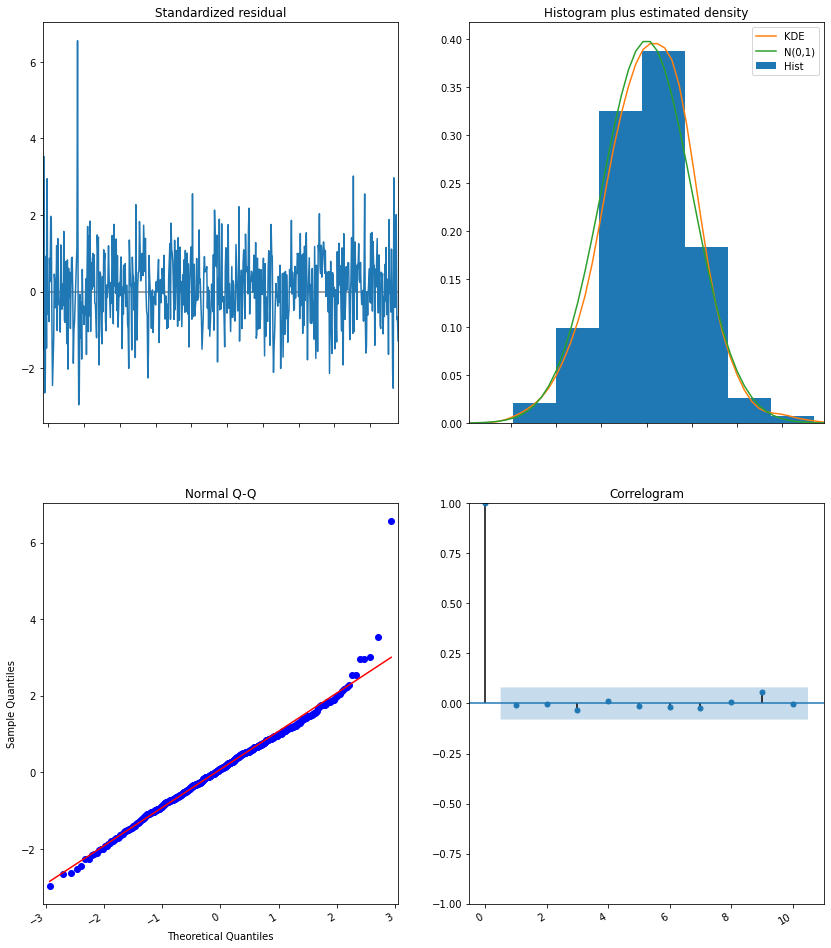

In [12]:
result.plot_diagnostics(figsize=(14,18))
plt.gcf().autofmt_xdate()
plt.show()

## 6. Exponential Smoothing Models (Holt-Winters)

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

ets_model = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods= 12)
ets_model_fit_with_box_cox = ets_model.fit(use_boxcox=True)

In [17]:
ets_model_fit_without_box_cox = ets_model.fit(use_boxcox=False)

In [18]:
ets_model_fit_with_box_cox.summary()

Dep. Variable:,endog,No. Observations:,610
Model:,ExponentialSmoothing,SSE,90.610
Optimized:,True,AIC,-1131.205
Trend:,Additive,BIC,-1060.590
Seasonal:,Multiplicative,AICC,-1130.048
Seasonal Periods:,12,Date:,"Wed, 08 Sep 2021"
Box-Cox:,True,Time:,20:06:12
Box-Cox Coeff.:,-2.26216,,
,coeff,code,optimized
smoothing_level,0.3684211,alpha,True
smoothing_slope,0.0526316,beta,True


In [19]:
ets_model_fit_without_box_cox.summary()

Dep. Variable:,endog,No. Observations:,610
Model:,ExponentialSmoothing,SSE,61.374
Optimized:,True,AIC,-1368.843
Trend:,Additive,BIC,-1298.228
Seasonal:,Multiplicative,AICC,-1367.686
Seasonal Periods:,12,Date:,"Wed, 08 Sep 2021"
Box-Cox:,False,Time:,20:06:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6865034,alpha,True
smoothing_slope,0.0086210,beta,True


### 6.1 Forecasting on Test data

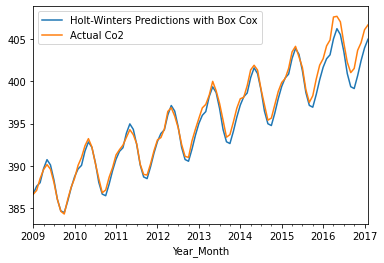

In [20]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions the test set 
exponential_model_predictions = ets_model_fit_with_box_cox.predict(start, end).rename("Holt-Winters Predictions with Box Cox") 
  
# plot predictions and actual values 
exponential_model_predictions.plot(legend = True) 
test.rename("Actual Co2").plot(legend = True)

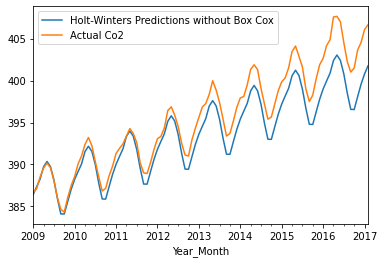

In [21]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions the test set 
exponential_model_predictions_without_box_cox = ets_model_fit_without_box_cox.predict(start, end).rename("Holt-Winters Predictions without Box Cox") 
  
# plot predictions and actual values 
exponential_model_predictions_without_box_cox.plot(legend = True) 
test.rename("Actual Co2").plot(legend = True)

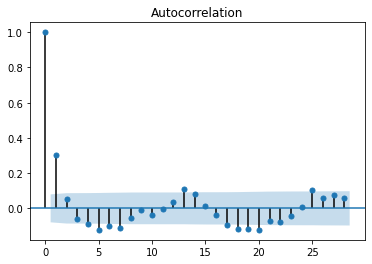

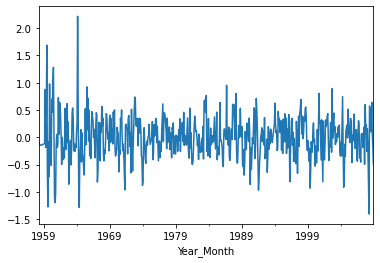

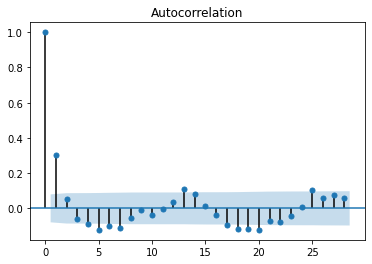

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
resid_boxcox = ets_model_fit_with_box_cox.resid
resid_boxcox.plot()
plot_acf(resid_boxcox)

### 6.2. Model Metrics and Evaluation

In [23]:
accuracy(test,exponential_model_predictions_without_box_cox)

,%MAPE,MAE,MFE,RMSE
0,0.5,1.9,1.9,2.4


In [24]:
accuracy(test,exponential_model_predictions)

,%MAPE,MAE,MFE,RMSE
0,0.2,0.7,0.6,0.9


# Using FB Prophet for Modeling and Evaluation

In [28]:
co2_month = maunaloa[['co2']].copy()
co2_month.head()

,co2
Year_Month,
1958-03-01,315.69
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,NaN
1958-07-01,315.86


In [30]:
# Resample from weekly to monthly
co2_month = maunaloa.co2.resample("MS").mean()

# Backfill any missing values
co2_month.fillna(method='bfill', inplace=True)
co2_month = co2_month.to_frame()
co2_month.head()

,co2
Year_Month,
1958-03-01,315.69
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,315.86
1958-07-01,315.86


In [31]:
# Reset the index to make the dates an ordinary column
co2_month.reset_index(inplace=True)

# Rename the columns
co2_month.columns = ['ds', 'y']
co2_month.head()

,ds,y
0,1958-03-01,315.69
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,315.86
4,1958-07-01,315.86


In [32]:
co2_train = co2_month[0:610]
co2_test  = co2_month[610:708]

In [33]:
co2_train.head()

,ds,y
0,1958-03-01,315.69
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,315.86
4,1958-07-01,315.86


## Train

In [38]:
from fbprophet import Prophet
# Fit model to training data and forecast
model = Prophet()
model.add_seasonality(name='yearly', period=365, fourier_order=1, prior_scale=0.1, mode='multiplicative')

In [39]:
model.fit(co2_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Test and Predict

In [40]:
future = model.make_future_dataframe(periods=98, freq='MS')
future.tail(10)

,ds
698,2016-05-01
699,2016-06-01
700,2016-07-01
701,2016-08-01
702,2016-09-01
703,2016-10-01
704,2016-11-01
705,2016-12-01
706,2017-01-01
707,2017-02-01


In [41]:
# Make predictions and compare to test data
y_pred = model.predict(co2_test)

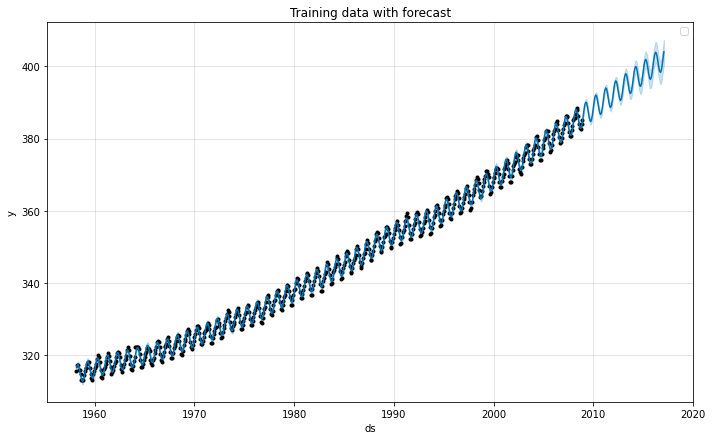

In [42]:
future = model.make_future_dataframe(periods=98, freq='MS')
forecast = model.predict(future)

# Plot the model and forecast
model.plot(forecast, uncertainty=True)
plt.title('Training data with forecast')
plt.legend();

## Visualize Forecasts and Decompositions for Explainability

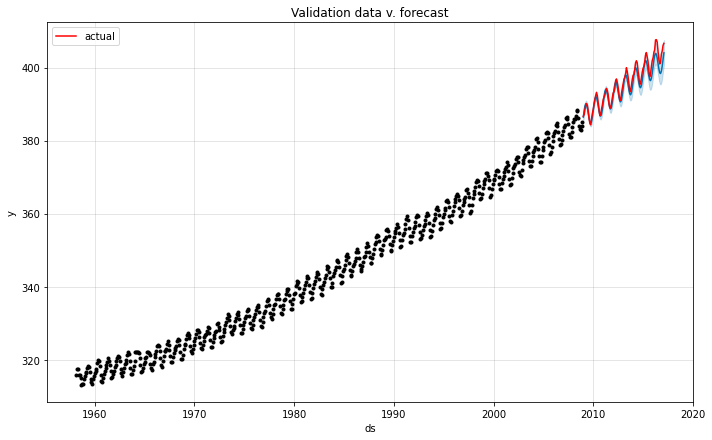

In [43]:
# Plot the model, forecast, and actual (test) data
model.plot(y_pred, uncertainty=True)
plt.plot(co2_test['ds'], co2_test['y'], color='r', label='actual')
plt.title('Validation data v. forecast')
plt.legend();

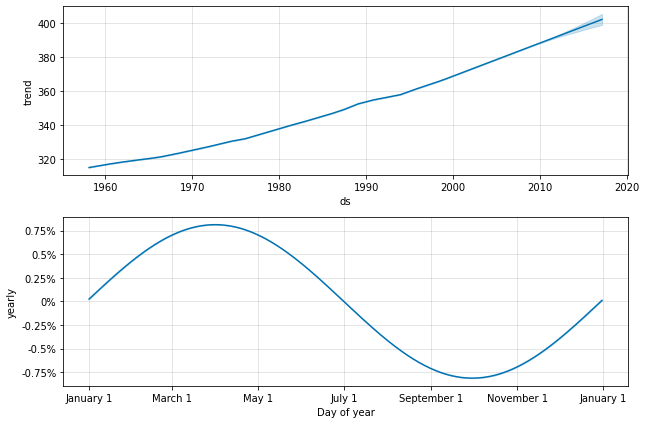

In [44]:
# Plot the model components
model.plot_components(forecast);

In [45]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
703,2016-10-01,401.632564,395.074333,401.359255,398.592396,404.617450,-0.008137,-0.008137,-0.008137,-0.008137,-0.008137,-0.008137,0.0,0.0,0.0,398.364481
704,2016-11-01,401.798718,395.817971,402.177284,398.729766,404.833968,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,-0.006933,0.0,0.0,0.0,399.012904
705,2016-12-01,401.959513,397.241616,403.632002,398.887540,405.036129,-0.003925,-0.003925,-0.003925,-0.003925,-0.003925,-0.003925,0.0,0.0,0.0,400.381820
706,2017-01-01,402.125667,398.868199,405.541710,399.005167,405.238132,0.000247,0.000247,0.000247,0.000247,0.000247,0.000247,0.0,0.0,0.0,402.225045
707,2017-02-01,402.291821,400.709951,407.414508,399.109746,405.451576,0.004351,0.004351,0.004351,0.004351,0.004351,0.004351,0.0,0.0,0.0,404.042011


In [46]:
test.tail(5)

Year_Month
2016-10-01    401.50
2016-11-01    403.64
2016-12-01    404.55
2017-01-01    406.07
2017-02-01    406.64
Freq: MS, Name: co2, dtype: float64

In [47]:
seasonal_features, _, component_cols, _ = model.make_all_seasonality_features(co2_test)

In [48]:
seasonal_features.tail(10)

,yearly_delim_1,yearly_delim_2
88,0.763889,-0.645348
89,0.329408,-0.944188
90,-0.179767,-0.983709
91,-0.655156,-0.755493
92,-0.948362,-0.317191
93,-0.981306,0.192452
94,-0.746972,0.664855
95,-0.321270,0.946988
96,0.205104,0.978740
97,0.674444,0.738326


In [49]:
component_cols

component,multiplicative_terms,yearly,additive_terms
col,,,
0,1,1,0
1,1,1,0


In [50]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper', "multiplicative_terms","multiplicative_terms_lower","multiplicative_terms_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper
698,2016-05-01,403.634663,400.664797,406.584016,400.812514,398.050867,403.551714,0.007041,0.007041,0.007041
699,2016-06-01,402.577057,399.635426,405.525574,400.978668,398.138058,403.756742,0.003986,0.003986,0.003986
700,2016-07-01,401.124607,398.116319,404.029676,401.139462,398.234787,403.957265,-0.000037,-0.000037,-0.000037
701,2016-08-01,399.631560,396.706895,402.597970,401.305616,398.384094,404.198626,-0.004172,-0.004172,-0.004172
702,2016-09-01,398.602849,395.569363,401.682648,401.471770,398.481930,404.410843,-0.007146,-0.007146,-0.007146
703,2016-10-01,398.364481,395.074333,401.359255,401.632564,398.592396,404.617450,-0.008137,-0.008137,-0.008137
704,2016-11-01,399.012904,395.817971,402.177284,401.798718,398.729766,404.833968,-0.006933,-0.006933,-0.006933
705,2016-12-01,400.381820,397.241616,403.632002,401.959513,398.887540,405.036129,-0.003925,-0.003925,-0.003925
706,2017-01-01,402.225045,398.868199,405.541710,402.125667,399.005167,405.238132,0.000247,0.000247,0.000247
707,2017-02-01,404.042011,400.709951,407.414508,402.291821,399.109746,405.451576,0.004351,0.004351,0.004351


In [51]:
model.params['beta'] 

array([[ 0.00801223, -0.00142654]])